# Figure Extended Data 9

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
import scanpy as sc
from pathlib import Path
import numpy as np
import pandas as pd
import scrublet as scr

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style("white")

sc.settings.verbosity=3

In [5]:
import os, sys
sys.path.append(f"{os.getcwd()}/../code")
from plotting.plot_settings import *
from plotting.palettes import *
from plotting.util import fix_main_adata_annos

In [6]:
from plotting.chord import sankey

In [7]:
from plotting.fig1 import summary_figure_1d, summary_figure_1e

## Load data

In [8]:
data_dir = f"{os.getcwd()}/../data"

In [9]:
org = sc.read(f"{data_dir}/org.h5ad")
idx = ~org.obs.source.isin(["tissue"])
org = org[idx].copy()

/projects/robson-lab/software/sumner/miniconda3/envs/endometriosis-2021-12/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [10]:
fig_dir = f"{os.getcwd()}/../figures"

In [11]:
key = "sample_type_rename"
src, dst = "nan", "UD"
cats = ["Ctrl", "EuE", "EcP", "EcPA"] + [dst]
org.obs[key] = org.obs[key].astype(str)
org.obs.loc[org.obs[key].isin([src]), key] = dst
org.obs[key] = org.obs[key].astype("category")
org.obs[key] = org.obs[key].cat.reorder_categories(cats)

In [12]:
org.obs["PID"] = org.obs["PID"].astype(str).fillna("MIX").astype("category")

In [15]:
org.obs["sampleid"].value_counts()

EC20017    9574
EC19013    3752
Name: sampleid, dtype: int64

## Fig S9a

In [138]:
sample_type_key = "sample_type_rename"
patient_key = "PID"

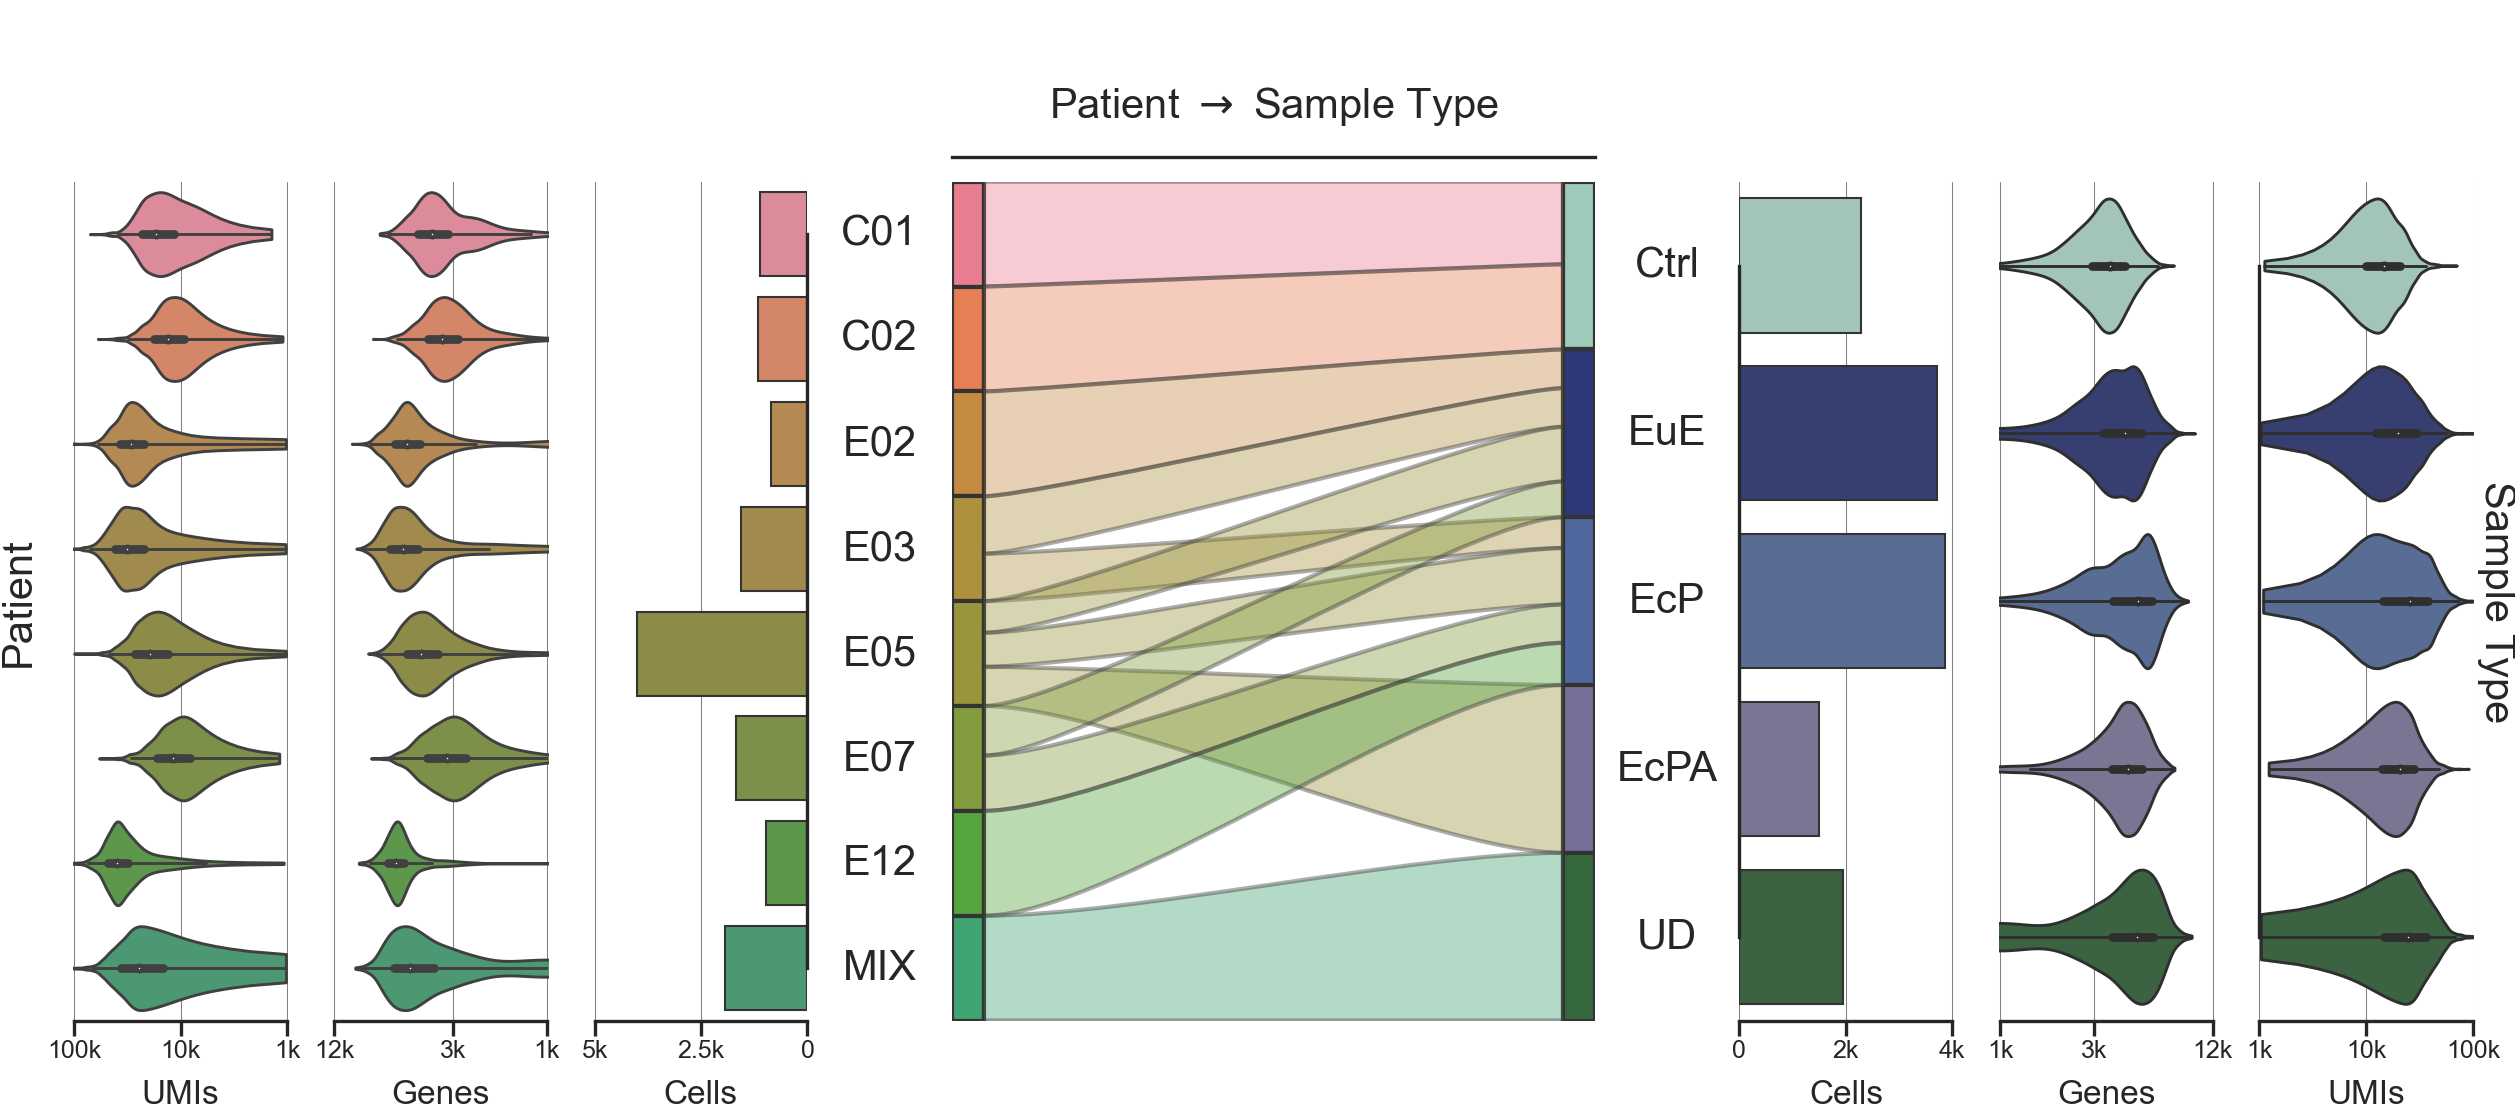

In [139]:
figX = summary_figure_1d(
    org, patient_key, sample_type_key, 
    x_palette=[], 
    left_palette=patient_palette, 
    right_palette=sample_type_palette,
    use_log=True,
    violin_limits = {
        "patient":     {"umis": (1000, 10000, 100000), "genes": (1000, 3000, 12000), "cells": (0, 2500, 5000)},
        "sample_type": {"umis": (1000, 10000, 100000), "genes": (1000, 3000, 12000), "cells": (0, 2000, 4000)},
    }
)

In [140]:
figX.savefig(f"{fig_dir}/figSX-pdo.pdf")